In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## CogSci 131 - Assignment 2
Selena Zhang

## Question 1a

Text(0.5, 1.0, 'Plot of Learning Model (V_x = 0.05)')

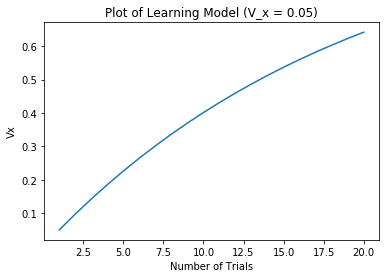

In [10]:
a = 0.5
b = 0.1
Vx = 0.05

def trial(a,b,Vx):
    deltaVx = a * b *(1 - Vx) 
    return deltaVx

yValues = [] 
i=1
while(i < 21):
    yValues.append(Vx) 
    Vx += trial(a, b, Vx) 
    i+=1

plt.plot(np.arange(1, 21), yValues) 
plt.xlabel("Number of Trials") 
plt.ylabel("Vx")
plt.title("Plot of Learning Model (V_x = 0.05)")

Text(0.5, 1.0, 'Plot of Learning Model (V_x = 0.5)')

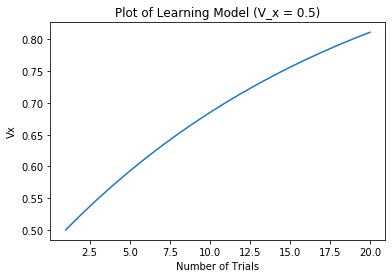

In [5]:
a_1 = 0.5
b_1 = 0.1
Vx_1 = 0.5

yValues1 = [] 
i_1=1
while(i_1 < 21):
    yValues1.append(Vx_1) 
    Vx_1 = Vx_1 + trial(a, b, Vx_1) 
    i_1+=1

plt.plot(np.arange(1, 21), yValues1) 
plt.xlabel("Number of Trials") 
plt.ylabel("Vx")
plt.title("Plot of Learning Model (V_x = 0.5)")

## Question 1b

From the graph produced in part a, we know that it takes between **31-32** trials before the association reaches 0.8. We can confirm this by calling yValues and figuring out where 0.8 is indexed.

In [9]:
yValues

[0.05,
 0.0975,
 0.142625,
 0.18549375,
 0.2262190625,
 0.26490810937500003,
 0.30166270390625005,
 0.3365795687109375,
 0.36975059027539064,
 0.4012630607616211,
 0.43119990772354005,
 0.45963991233736307,
 0.4866579167204949,
 0.5123250208844702,
 0.5367087698402466,
 0.5598733313482342,
 0.5818796647808225,
 0.6027856815417814,
 0.6226463974646923,
 0.6415140775914577,
 0.6594383737118849,
 0.6764664550262907,
 0.6926431322749761,
 0.7080109756612273,
 0.7226104268781659,
 0.7364799055342576,
 0.7496559102575447,
 0.7621731147446675,
 0.7740644590074341,
 0.7853612360570624,
 0.7960931742542093,
 0.8062885155414988]

## Question 1c

You would need a salience of around **1.26** in order to exceed 0.8 for assocation within 13 trials. The code below confirms this, and I just kept changing a_1c until I reached a salience that had around 0.8 as its last y value.

In [49]:
a_1c = 1.26
b_1c = 0.1
Vx_1c = 0

yValues_1c = [] 
i_1c=1
while(i_1c < 14):
    yValues_1c.append(Vx_1c) 
    Vx_1c += trial(a_1c, b_1c, Vx_1c) 
    i_1c+=1

yValues_1c

[0,
 0.126,
 0.236124,
 0.332372376,
 0.416493456624,
 0.490015281089376,
 0.5542733556721147,
 0.6104349128574282,
 0.6595201138373923,
 0.7024205794938808,
 0.7399155864776519,
 0.7726862225814677,
 0.8013277585362027]

## Question 2

I'm going to assume that the initial $V_{bell}(t) = 0$

Text(0.5, 1.0, 'Plot of Learning Model of Bell and Food with Light Present')

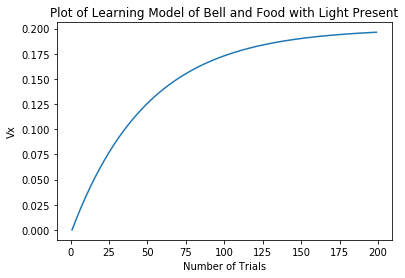

In [50]:
a_bell = 0.2
b_2 = 0.1
Vx_bell = 0
Vx_light = 0.8

def trial_multiple_CS(a, b, V1, V2): 
    deltaVx = a * b *(1 - (V1 + V2))
    return deltaVx

yValues2 = [] 
i_2=1
while(i_2 < 200):
    yValues2.append(Vx_bell) 
    Vx_bell += trial_multiple_CS(a_bell, b_2, Vx_bell, Vx_light) 
    i_2+=1

plt.plot(np.arange(1, 200), yValues2) 
plt.xlabel("Number of Trials") 
plt.ylabel("Vx")
plt.title("Plot of Learning Model of Bell and Food with Light Present")

## Question 3a

Like question 2, I will also assume initial $V_x = 0$. 

Here, we can see that after 200 trials, $V_x$ will converge to 0.5, even after alternating between learning and extinction. This is because we start out with a low $V_x$ (initial_learn): a learning trial has $(1-V_x)$, and a low $V_x$ means that $(1-V_x)$ will be very high. As a result, the learning trials $(1-V_x)$ will be greater than the extinction trials $(V_x)$ for all $V_x < 0.5$, which is why we still see an increase of V_x after alternating between the learning and extinction rate. Once we get to $V_x = 0.5$, $1-V_x$ and $V_x$ are the same, so they end up having a difference of 0 and keep the $V_x$ at 0.5.

On a more psychological level, we could argue that the subject learns the association quicker but then forgets it less quickly, and they'll still have an overall increase in association if you alternate between food and no food.

Text(0.5, 0, 'Trials')

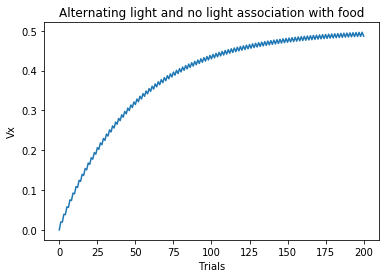

In [57]:
possibilities = ["food", "no_food"]*100
a_3 = 0.2
b_3 = 0.1
initial_learn = 0

learning_over_time = [initial_learn]

def extinction_trial(a, b, Vx):
    deltaVx = a * b *Vx 
    return deltaVx
    

for p in possibilities:
    if p == "food":
        initial_learn += trial(a_3, b_3, initial_learn)
        learning_over_time.append(initial_learn)
    elif p == "no_food":
        initial_learn -= extinction_trial(a_3, b_3, initial_learn)
        learning_over_time.append(initial_learn)
    continue
    
x=np.arange(len(learning_over_time)) 
plt.figure()
plt.plot(x,learning_over_time)
plt.title("Alternating light and no light association with food") 
plt.ylabel("Vx") 
plt.xlabel("Trials")

## Question 3b

I will choose a probability $p=08$.

Marr's level of analysis on the computational level examines what problems a particular system solves and whether it is optimal. 

The reason one would make this would be to see how different probabilities of receiving and not receiving food would impact overall association after numerous trials. Really high values of p would most likely converge to some value because there would be no extinction, but if there was a lower value of p, there would be a mix of learning and extinction that would make it difficult to find a convergance. However, after hundreds of trials, we can see the general trajectory of the association rate given the frequency of the stimulus, as well as the average association rate that it will hover around. In the graph below, it looks like the association rate hovers around 0.8. This system is not the most optimal, but would get the job done: for many values of p, it would require thousands of trials in order to see a true pattern. 

Text(0.5, 0, 'Trials')

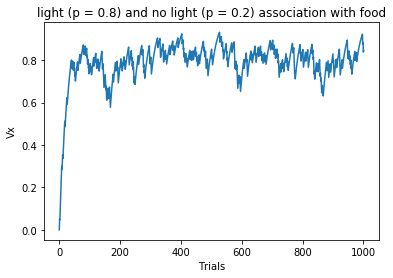

In [72]:
a_3b = 0.5
b_3b = 0.1
Vx_3b = 0

Vx_time = [Vx_3b]

i = 0
while i <=1000:
    rng = np.random.choice(np.arange(1, 101), 1)
    if rng <= 80:
        Vx_3b += trial(a_3b, b_3b, Vx_3b)
        Vx_time.append(Vx_3b)
    elif rng > 80:
        Vx_3b -= extinction_trial(a_3b, b_3b, Vx_3b)
        Vx_time.append(Vx_3b)
    i +=1

x_3b = np.arange(len(Vx_time))
plt.figure()
plt.plot(x_3b,Vx_time)
plt.title("light (p = 0.8) and no light (p = 0.2) association with food") 
plt.ylabel("Vx") 
plt.xlabel("Trials")

## Question 4

Salience is the intensity of the stimulus, and the learning rate is how receptive the subject is to learning new things. Though they are lumped together in the R-W model, they are distinctly different because the stimulus is independent of an individual's learning rate.

To test the differences between them, I would have a stimulus with a very low salience $\alpha$ (i.e. a very faint bell) and comparing the association rate across different subjects with different learning rate $\beta$ (i.e. different subjects that are able to learn more efficiently). Conversely, I could also have subjects with the same learning rate $\beta$ and expose them to varying saliences $\alpha$, and then calculate the association rates (i.e. same subject, varying volumes of bells).
